In [11]:
import pandas as pd
import missingno as msno

In [13]:
df_deaths = pd.read_csv('deaths.csv', error_bad_lines=False)
df_deaths.head()

b'Skipping line 6488: expected 13 fields, saw 25\nSkipping line 14950: expected 13 fields, saw 14\nSkipping line 24290: expected 13 fields, saw 25\nSkipping line 42212: expected 13 fields, saw 25\n'


,death_number,username,player_name,rank,cause_of_death,brute_damage,brain_damage,fire_damage,oxy_damage,tox_damage,clone_damage,stamina_damage,murder_suspect
0,,AuStation -,,none,Blunt-Force Trauma,BRU,BRA,FIR,OXY,TOX,CLN,STM,none
1,2,mcterra,Cora Mathews,none,Severe Burns,0,0,163,40,0,0,0,none
2,1,rogueninja299,Sylar,none,Suffocation,60,0,11,200,0,0,0,none
3,3,nyarlo,Ebba Endsley,none,Severe Burns,0,0,203,3,0,0,0,none
4,,AuStation -,,none,Blunt-Force Trauma,BRU,BRA,FIR,OXY,TOX,CLN,STM,none


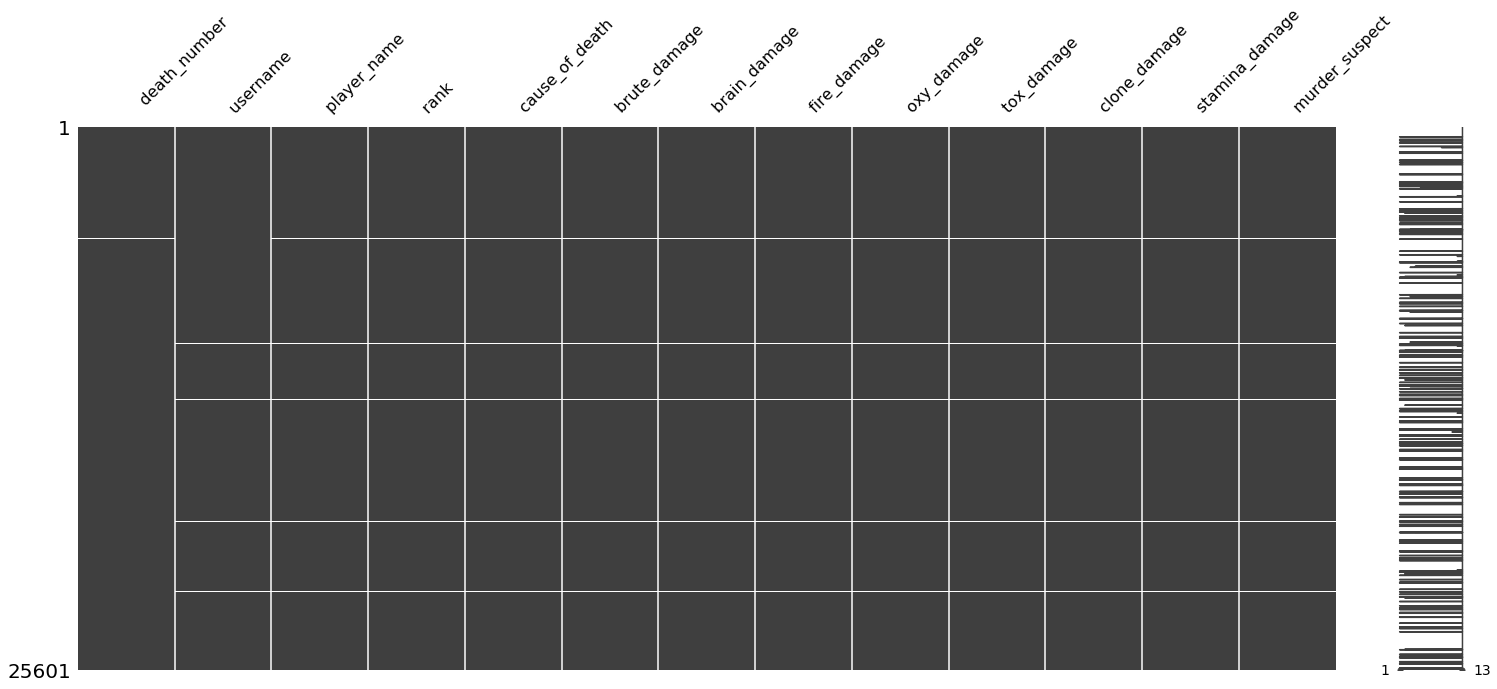

In [14]:
msno.matrix(df_deaths)

In [15]:
df_deaths.isna().sum()

   death_number     14
 username          191
 player_name       207
 rank              214
 cause_of_death    220
 brute_damage      221
 brain_damage      222
 fire_damage       222
 oxy_damage        223
 tox_damage        225
 clone_damage      226
 stamina_damage    227
 murder_suspect    235
dtype: int64

In [ ]:
df_rounds = pd.read_csv('rounds.csv', error_bad_lines=False)
df_rounds.head()

In [ ]:
msno.matrix(df_rounds)

In [ ]:
df_rounds.isna().sum()